<a href="https://colab.research.google.com/github/NathanielGetachew/Image_Detection_yolo/blob/main/ImgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLO Wind Farm Detection on Google Colab**

This notebook trains a YOLOv8 model to detect wind turbines in images using a dataset from Kaggle. It includes automatic dataset download, training, inference, and model saving.

# ## **1. Set Up Environment**
# Install YOLOv8 and required libraries

In [ ]:
!pip install ultralytics opencv-python matplotlib --quiet

import ultralytics
import torch
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files

print(f"Using YOLOv8 version: {ultralytics.__version__}")
print(f"Using Torch version: {torch.__version__}")
print("Setup complete.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultral

# ## **2. Download and Prepare Dataset**
# Upload  Kaggle API key manually

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nathnaelgetachew","key":"fca98eeb5d5163b7c28e3ff891293c6b"}'}

# Create Kaggle directory and move the API key

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset


In [ ]:
!kaggle datasets download -d kylegraupe/wind-turbine-image-dataset-for-computer-vision --unzip -p /content/datasets/


Dataset URL: https://www.kaggle.com/datasets/kylegraupe/wind-turbine-image-dataset-for-computer-vision
License(s): CC0-1.0
100% 615M/617M [00:07<00:00, 75.5MB/s]
100% 617M/617M [00:07<00:00, 90.3MB/s]


# Verify dataset structure


In [ ]:
!ls /content/datasets/*
data_yaml = "/content/datasets/data.yaml"  # Ensure this file exists

# Check if dataset YAML exists
if not os.path.exists(data_yaml):
    raise FileNotFoundError(f"Dataset YAML file not found at {data_yaml}. Please check the path.")

print("Dataset found. Proceeding with training.")


/content/datasets/data.yaml	      /content/datasets/README.roboflow.txt
/content/datasets/README.dataset.txt

/content/datasets/test:
images	labels

/content/datasets/train:
images	labels

/content/datasets/valid:
images	labels
Dataset found. Proceeding with training.


# ## **3. Train YOLOv8 Model**


In [7]:
from ultralytics import YOLO

# Define dataset path
data_yaml = "/content/datasets/data.yaml"  # Update with correct YAML path

# Load YOLO model
yolo_model = YOLO("yolov8s.pt")  # Using a small YOLOv8 model

# Train model
yolo_model.train(data=data_yaml, epochs=10, imgsz=320, batch=2)

100%|██████████| 21.5M/21.5M [00:00<00:00, 137MB/s] 


Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/data.yaml, epochs=10, time=None, patience=100, batch=2, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/datasets/train/labels... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:01<00:00, 1877.13it/s]


train: New cache created: /content/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 1746.20it/s]

val: New cache created: /content/datasets/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.446      1.206       1.13          2        320: 100%|██████████| 1322/1322 [29:05<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:40<00:00,  1.54it/s]

                   all        247       1562      0.366      0.344      0.273      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.206     0.8079      1.028          2        320: 100%|██████████| 1322/1322 [28:03<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:38<00:00,  1.59it/s]

                   all        247       1562      0.422      0.453      0.381      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.099      0.711     0.9787          4        320: 100%|██████████| 1322/1322 [27:57<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:40<00:00,  1.53it/s]

                   all        247       1562      0.478      0.574      0.467      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.047     0.6774     0.9596          7        320: 100%|██████████| 1322/1322 [28:06<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:39<00:00,  1.57it/s]

                   all        247       1562      0.694      0.535      0.572      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.9758     0.6221     0.9291         12        320: 100%|██████████| 1322/1322 [27:36<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:40<00:00,  1.55it/s]

                   all        247       1562      0.683      0.433      0.496      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      0.903     0.5486     0.9046          1        320: 100%|██████████| 1322/1322 [27:52<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:40<00:00,  1.53it/s]

                   all        247       1562      0.816      0.483      0.541      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.8547     0.5033     0.8913          1        320: 100%|██████████| 1322/1322 [27:45<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:38<00:00,  1.62it/s]

                   all        247       1562      0.767      0.597      0.645       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.8106     0.4774      0.876          2        320: 100%|██████████| 1322/1322 [27:13<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:37<00:00,  1.64it/s]

                   all        247       1562      0.752      0.558      0.634      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7705     0.4459     0.8626          2        320: 100%|██████████| 1322/1322 [26:47<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:37<00:00,  1.66it/s]

                   all        247       1562      0.819      0.562      0.636      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.7218     0.4171     0.8538          2        320: 100%|██████████| 1322/1322 [26:53<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:38<00:00,  1.61it/s]

                   all        247       1562      0.857      0.572      0.662      0.301



10 epochs completed in 4.736 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.93 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:37<00:00,  1.66it/s]


                   all        247       1562      0.856      0.572      0.662      0.301
           cable tower          7         24      0.845      0.583      0.632      0.242
               turbine        239       1538      0.867       0.56      0.691       0.36
Speed: 0.4ms preprocess, 135.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d9c9b9fbd90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# ## **4. Save Trained Model**

In [8]:
# Save best model after training
!mkdir -p /content/saved_models
!cp runs/detect/train/weights/best.pt /content/saved_models/yolo_windfarm.pt
print("Model saved to /content/saved_models/yolo_windfarm.pt")


Model saved to /content/saved_models/yolo_windfarm.pt


## **5. Run Inference on Validation Images**

In [15]:
image_path = "/content/datasets/valid/images/"
results = yolo_model.predict(source=image_path, save=True)


image 1/247 /content/datasets/valid/images/cabletower4_jpg.rf.26f337411e509ecc43dd680ea567c2ab.jpg: 224x320 1 cable tower, 143.8ms
image 2/247 /content/datasets/valid/images/cabletower71_jpg.rf.23a0ef8dade58133602c42586b284843.jpg: 224x320 1 cable tower, 131.2ms
image 3/247 /content/datasets/valid/images/pexels-andre-moura-2402438_jpg.rf.0c06c12fe1b3d5eff37e896acacd2670.jpg: 320x256 (no detections), 154.0ms
image 4/247 /content/datasets/valid/images/pexels-brett-sayles-1936750_jpg.rf.3dcfffb3613e994aa7541938bfb76511.jpg: 224x320 8 cable towers, 125.7ms
image 5/247 /content/datasets/valid/images/pexels-dids-2801055_jpg.rf.bbcca973ac621eb98e2a52868210ba3b.jpg: 320x224 (no detections), 134.9ms
image 6/247 /content/datasets/valid/images/pexels-md-molla-923953_jpg.rf.6f9ebcd56fa9bf1709cfe657a0f27d29.jpg: 192x320 2 cable towers, 1 turbine, 109.4ms
image 7/247 /content/datasets/valid/images/pexels-pok-rie-189524_jpg.rf.ba12b5a266fbd6f3c9599e2ef588aec0.jpg: 256x320 2 cable towers, 154.7ms
ima

 **6. Display Results**

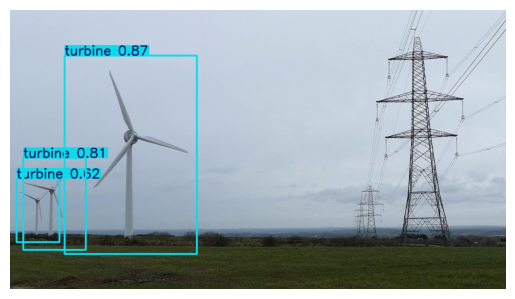

In [16]:
# Check if results directory exists
results_dir = "runs/detect/train3/"  # Update to match actual saved path
if os.path.exists(results_dir) and os.listdir(results_dir):
    result_files = os.listdir(results_dir)
    result_image_path = os.path.join(results_dir, result_files[0])  # Show first detected image
    result_image = cv2.imread(result_image_path)
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    plt.imshow(result_image)
    plt.axis("off")
    plt.show()
else:
    print("No detection results found or results directory does not exist.")